In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

from utils import plot_boxplots, print_latex_table

import warnings
warnings.filterwarnings('ignore')

In [2]:
log_dir = '/scratch/midway3/jshe/molecular-attention-bias/homo_lumo_U'

## Load data from log directory

In [3]:
logs = []
for root, dirs, files in os.walk(log_dir):
    if not files: continue
    if 'model.pt' not in files: continue
    
    *_, model_type, radial_function_type, architecture, run_id = root.split('/')
    run_id = run_id.replace('_', '')

    log_file = os.path.join(root, 'log.csv')
    model_file = os.path.join(root, 'model.pt')

    log = pd.read_csv(log_file)
    log.columns = [f'{model_type}_{radial_function_type}_{architecture}_{col}_{run_id}' for col in log.columns]
    logs.append(log)

logs = pd.concat(logs, axis=1)
tuples = [tuple(col.split('_')) for col in logs.columns]
logs.columns = pd.MultiIndex.from_tuples(
    tuples, 
    names=['model_type', 'radial_function_type', 'architecture', 'split', 'property', 'metric', 'run_id']
)

## Single model ensemble loss curves

In [26]:
model_type = 'BiasedAttentionTransformer'
radial_function_type = 'GaussianKernel64'
architecture = 'E64H8D8'

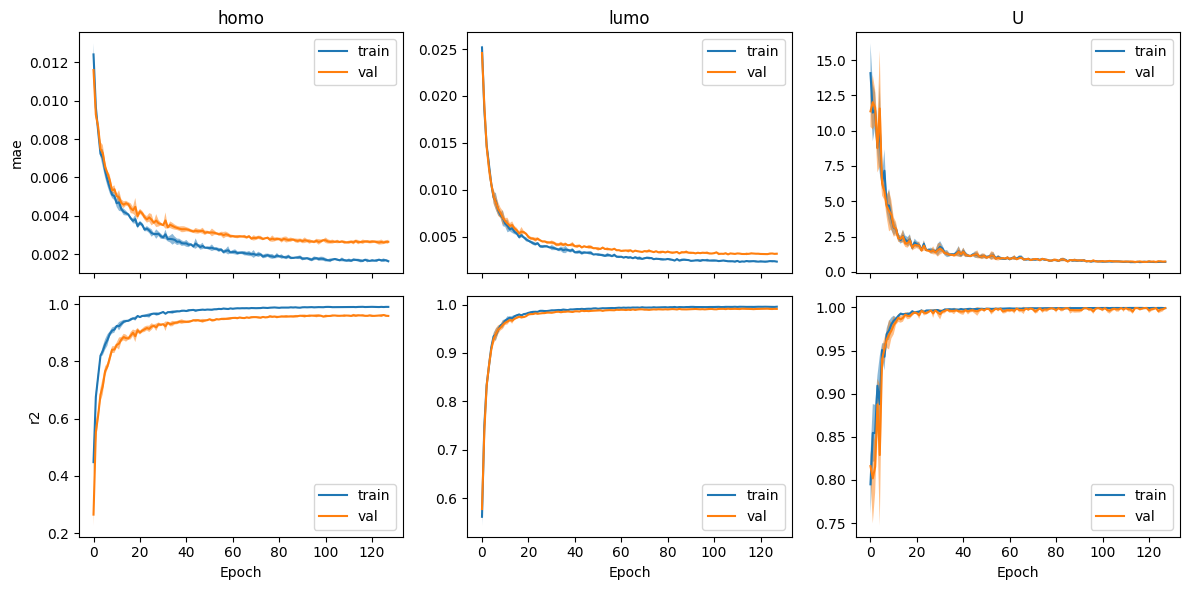

In [27]:
splits = logs.columns.get_level_values('split').unique()
properties = logs.columns.get_level_values('property').unique()
metrics = logs.columns.get_level_values('metric').unique()

fig, axs = plt.subplots(
    len(metrics), len(properties), 
    figsize=(len(properties) * 4, len(metrics) * 3), 
    sharex=True
)

for column, property in enumerate(properties):
    axs[0, column].set_title(property)
    for row, metric in enumerate(metrics):
        axs[row, 0].set_ylabel(metric)
        if row == len(metrics) - 1: axs[row, column].set_xlabel('Epoch')
        for split in splits:
            ax = axs[row, column]

            log = logs[model_type, radial_function_type, architecture, split, property, metric]
            # for run_id in log.columns:
            #     color = 'r' if split == 'train' else 'b'
            #     ax.plot(log[run_id], color=color)
            
            mean = log.mean(axis=1)
            std = log.std(axis=1)
            ax.plot(mean, label=split)
            ax.fill_between(x=range(len(log)), y1=mean - std, y2=mean + std, alpha=0.5)
            ax.legend()
            #if metric == 'mae': ax.set_yscale('log')

fig.tight_layout()

## Ensemble loss distributions

## Biased Attention

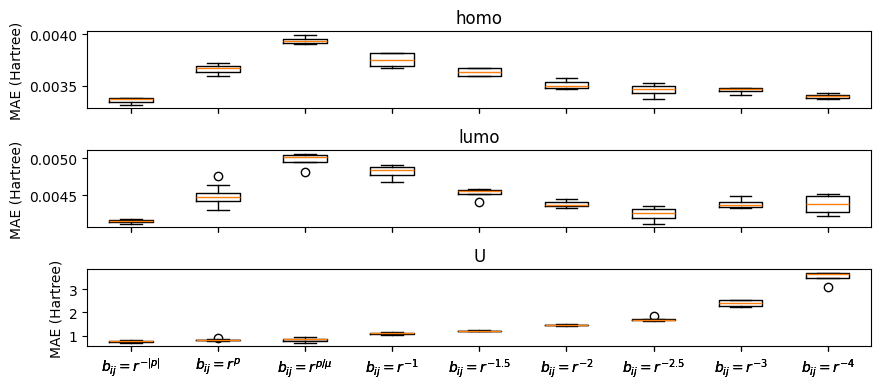

In [ ]:
models = [
    ('$b_{ij} = r^{-|p|}$', 'BiasedAttentionTransformer', 'ExpNegativePowerLaw', 'E64H8D8'), 
    ('$b_{ij} = r^{p}$', 'BiasedAttentionTransformer', 'PowerLaw', 'E64H8D8'), 
    #('$b_{ij} = r^{p}$', 'BiasedAttentionTransformer', 'PowerLaw', 'E128H8D2'), 
    #('$b_{ij} = r^{p}$', 'BiasedAttentionTransformer', 'PowerLaw', 'E128H8D8'), 
    #('$b_{ij} = 1$', 'BiasedAttentionTransformer', 'Zeros', 'E64H8D8'), 
    #('$b_{ij} = r^{-0.125}$', 'BiasedAttentionTransformer', 'FixedPowerLaw-0.125', 'E64H8D8'), 
    #('$b_{ij} = r^{-0.25}$', 'BiasedAttentionTransformer', 'FixedPowerLaw-0.25', 'E64H8D8'), 
    #('$b_{ij} = r^{-0.5}$', 'BiasedAttentionTransformer', 'FixedPowerLaw-0.5', 'E64H8D8'), 
    ('$b_{ij} = r^{-1}$', 'BiasedAttentionTransformer', 'FixedPowerLaw-1', 'E64H8D8'), 
    ('$b_{ij} = r^{-1.5}$', 'BiasedAttentionTransformer', 'FixedPowerLaw-1.5', 'E64H8D8'), 
    ('$b_{ij} = r^{-2}$', 'BiasedAttentionTransformer', 'FixedPowerLaw-2', 'E64H8D8'), 
    ('$b_{ij} = r^{-2.5}$', 'BiasedAttentionTransformer', 'FixedPowerLaw-2.5', 'E64H8D8'), 
    ('$b_{ij} = r^{-3}$', 'BiasedAttentionTransformer', 'FixedPowerLaw-3', 'E64H8D8'), 
    ('$b_{ij} = r^{-4}$', 'BiasedAttentionTransformer', 'FixedPowerLaw-4', 'E64H8D8'), 
]
plot_boxplots(logs, models)

## Fixed Attention

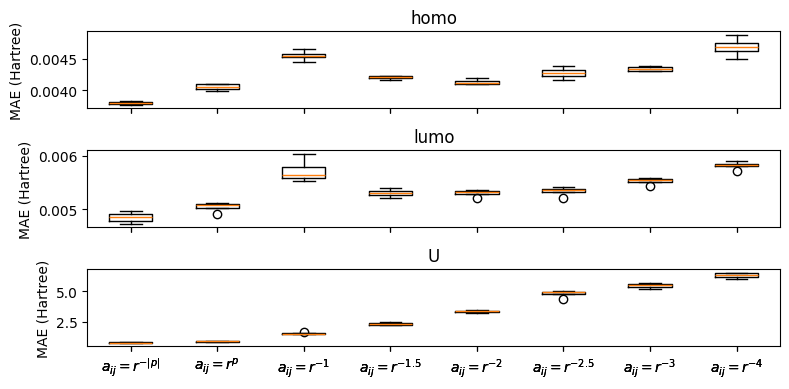

In [8]:
models = [
    ('$a_{ij} = r^{-|p|}$', 'FixedAttentionTransformer', 'ExpNegativePowerLaw', 'E64H8D8'), 
    ('$a_{ij} = r^{p}$', 'FixedAttentionTransformer', 'PowerLaw', 'E64H8D8'), 
    #('$a_{ij} = r^{-0.5}$', 'FixedAttentionTransformer', 'FixedPowerLaw-0.5', 'E64H8D8'), 
    ('$a_{ij} = r^{-1}$', 'FixedAttentionTransformer', 'FixedPowerLaw-1', 'E64H8D8'), 
    ('$a_{ij} = r^{-1.5}$', 'FixedAttentionTransformer', 'FixedPowerLaw-1.5', 'E64H8D8'), 
    ('$a_{ij} = r^{-2}$', 'FixedAttentionTransformer', 'FixedPowerLaw-2', 'E64H8D8'), 
    ('$a_{ij} = r^{-2.5}$', 'FixedAttentionTransformer', 'FixedPowerLaw-2.5', 'E64H8D8'), 
    ('$a_{ij} = r^{-3}$', 'FixedAttentionTransformer', 'FixedPowerLaw-3', 'E64H8D8'), 
    ('$a_{ij} = r^{-4}$', 'FixedAttentionTransformer', 'FixedPowerLaw-4', 'E64H8D8'), 
]
plot_boxplots(logs, models)

## Inductive Biases

In [ ]:
models = [
    #('None', 'BiasedAttentionTransformer', 'Zeros', 'E64H8D8'), 
    ('$p=-2$', 'BiasedAttentionTransformer', 'FixedPowerLaw-2', 'E64H8D8'), 
    ('$p$', 'BiasedAttentionTransformer', 'PowerLaw', 'E64H8D8'), 
    ('$|p|$', 'BiasedAttentionTransformer', 'ExpNegativePowerLaw', 'E128H8D8'), 
    ('$|p|$', 'FixedAttentionTransformer', 'ExpNegativePowerLaw', 'E128H8D8'), 
    ('Gaussian Kernel', 'BiasedAttentionTransformer', 'GaussianKernel32', 'E128H8D8'), 
    ('RWPE', 'GraphPETransformer', 'RandomWalkPE16', 'E128H8D8'), 
    ('Mask', 'GraphAttentionTransformer', 'MaskedSDPA', 'E128H8D8'), 
]
plot_boxplots(logs, models)
print_latex_table(logs, models)


\hline
&  homo & lumo & U \\
\hline
None & $0.3203 \pm 0.0023$ & $0.6947 \pm 0.0023$ & $18.6160 \pm 1.3709$ \\
\hline
$p=-2$ & $0.0790 \pm 0.0011$ & $0.0938 \pm 0.0015$ & $26.8454 \pm 1.2764$ \\
\hline
$p$ & $0.0811 \pm 0.0020$ & $0.0947 \pm 0.0024$ & $22.7122 \pm 2.5309$ \\
\hline
$|p|$ & $0.0756 \pm 0.0020$ & $0.0883 \pm 0.0010$ & $18.5201 \pm 0.6939$ \\
\hline
Gaussian Kernel & $0.0588 \pm 0.0011$ & $0.0678 \pm 0.0016$ & $21.8250 \pm 3.8088$ \\
\hline
RWPE & $0.1150 \pm 0.0017$ & $0.1414 \pm 0.0019$ & $32.3471 \pm 1.2537$ \\
\hline
Mask & $0.0992 \pm 0.0014$ & $0.1181 \pm 0.0016$ & $25.5914 \pm 2.3979$ \\
\hline


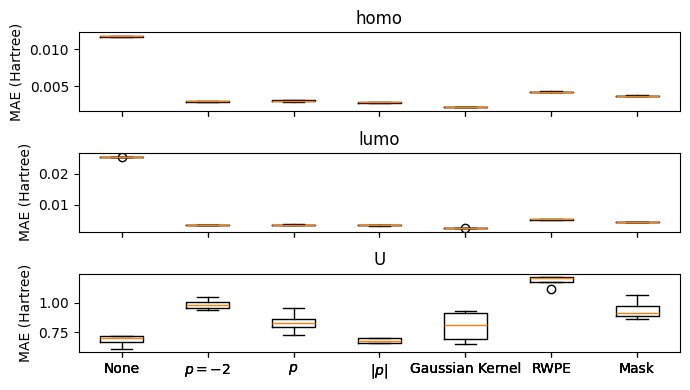

In [7]:
models = [
    ('None', 'BiasedAttentionTransformer', 'Zeros', 'E64H8D8'), 
    ('$p=-2$', 'BiasedAttentionTransformer', 'FixedPowerLaw-2', 'E128H8D8'), 
    ('$p$', 'BiasedAttentionTransformer', 'PowerLaw', 'E128H8D8'), 
    ('$|p|$', 'BiasedAttentionTransformer', 'ExpNegativePowerLaw', 'E128H8D8'), 
    #('$|p|$', 'FixedAttentionTransformer', 'ExpNegativePowerLaw', 'E128H8D8'), 
    ('Gaussian Kernel', 'BiasedAttentionTransformer', 'GaussianKernel32', 'E128H8D8'), 
    ('RWPE', 'GraphPETransformer', 'RandomWalkPE16', 'E128H8D8'), 
    ('Mask', 'GraphAttentionTransformer', 'MaskedSDPA', 'E128H8D8'), 
]
plot_boxplots(logs, models)
print_latex_table(logs, models)


## Scaling

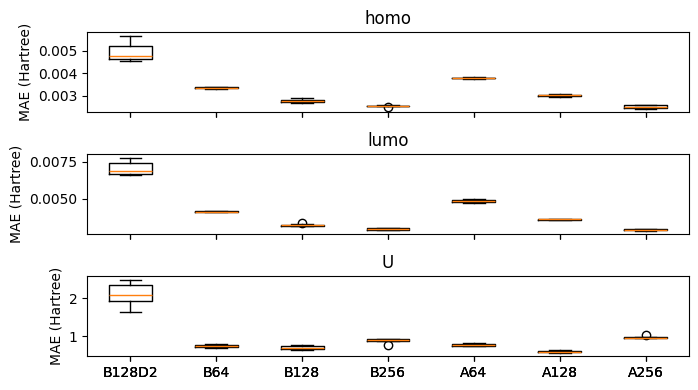

In [ ]:
models = [
    ('B64', 'BiasedAttentionTransformer', 'ExpNegativePowerLaw', 'E64H8D8'), 
    ('B128', 'BiasedAttentionTransformer', 'ExpNegativePowerLaw', 'E128H8D8'), 
    ('B256', 'BiasedAttentionTransformer', 'ExpNegativePowerLaw', 'E256H8D8'), 
    # ('A64', 'FixedAttentionTransformer', 'ExpNegativePowerLaw', 'E64H8D8'), 
    # ('A128', 'FixedAttentionTransformer', 'ExpNegativePowerLaw', 'E128H8D8'), 
    # ('A256', 'FixedAttentionTransformer', 'ExpNegativePowerLaw', 'E256H8D8'), 
]
plot_boxplots(logs, models)

In [8]:
models = [
    ('$p=-2$', 'FixedPowerLaw-2', 'E128H8D8'), 
    ('Learned $p$', 'PowerLaw', 'E64H8D8'), 
    ('Learned $|p|$', 'ExpNegativePowerLaw', 'E128H8D8'), 
    ('Gaussian Kernel', 'GaussianKernel32', 'E64H8D8')
]

properties = logs.columns.get_level_values('property').unique()

print('\\hline')
print('& ', ' & '.join(properties), '\\\\')
print('\\hline')

for label, radial_function_type, architecture in models:
    row_str = [label]
    for property in properties:

        fixed_ensemble = logs['FixedAttentionTransformer', radial_function_type, architecture, 'val', property, 'mae']
        fixed_loss = fixed_ensemble.min().mean()

        biased_ensemble = logs['BiasedAttentionTransformer', radial_function_type, architecture, 'val', property, 'mae']
        biased_loss = biased_ensemble.min().mean()

        percentages = (fixed_loss - biased_loss) / biased_loss * 100

        row_str.append(f"${'-' if percentages < 0 else '+'}{abs(percentages):.2f}\%$")

    print(' & '.join(row_str), '\\\\')
    print('\\hline')

\hline
&  homo & lumo & U \\
\hline
$p=-2$ & $+11.80\%$ & $+15.63\%$ & $+38.06\%$ \\
\hline
Learned $p$ & $+10.68\%$ & $+12.38\%$ & $+7.48\%$ \\
\hline
Learned $|p|$ & $+9.10\%$ & $+12.09\%$ & $-11.92\%$ \\
\hline
Gaussian Kernel & $+9.48\%$ & $+7.72\%$ & $+9.47\%$ \\
\hline
